In [42]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [61]:
# Target User Account
target_users = ["@BBC",'@CBS','@CNN','@FoxNews','@nytimes']
usernames = ['BBC','CBS','CNN','Fox News','New York Times']

# Variables for holding sentiments
index = []
ago = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
text = []
date = []

for i in range(len(target_users)):
    num=0
    for x in range(1, 6):
        public_tweets = api.user_timeline(target_users[i], page=x)
        for tweet in public_tweets:
            num += 1
            results = analyzer.polarity_scores(tweet['text'])
            index.append(usernames[i])
            ago.append(num)
            compound_list.append(results["compound"])
            positive_list.append(results["pos"])
            negative_list.append(results["neg"])
            neutral_list.append(results["neu"])
            text.append(tweet['text'])
            date.append(tweet['created_at'])
df = pd.DataFrame({'users':index,'tweet polarity':compound_list,'tweets ago':ago,'positive':positive_list,
                   'negative':negative_list,'neutral':neutral_list,'text':text,'date':date})
df.to_csv('data.csv')
df

,date,negative,neutral,positive,text,tweet polarity,tweets ago,users
0,Sat Jul 14 19:03:07 +0000 2018,0.000,1.000,0.000,"Tonight, @reginalddhunter takes a 2,000-mile m...",0.0000,1,BBC
1,Sat Jul 14 18:03:04 +0000 2018,0.000,0.843,0.157,There's a clear difference in the way boys and...,0.3818,2,BBC
2,Sat Jul 14 17:32:50 +0000 2018,0.000,0.628,0.372,🎾 Angelique Kerber beat seven-time champion Se...,0.8271,3,BBC
3,Sat Jul 14 16:23:10 +0000 2018,0.000,0.848,0.152,RT @BBCSport: Angelique Kerber is the #wimbled...,0.6688,4,BBC
4,Sat Jul 14 16:03:05 +0000 2018,0.111,0.527,0.362,"""We'll definitely keep in touch!"" 👋 *Immediat...",0.6476,5,BBC
5,Sat Jul 14 13:03:04 +0000 2018,0.000,1.000,0.000,A wild banana that may hold the key to protect...,0.0000,6,BBC
6,Sat Jul 14 12:10:55 +0000 2018,0.000,1.000,0.000,There she goes! 🚢 🌊\n\nThe RRS Sir David Atten...,0.0000,7,BBC
7,Sat Jul 14 12:08:51 +0000 2018,0.000,0.873,0.127,RT @bbctennis: Meghan Markle has arrived!\n\nT...,0.5411,8,BBC
8,Sat Jul 14 12:04:02 +0000 2018,0.000,1.000,0.000,We all know a hipster restaurant that's taken ...,0.0000,9,BBC
9,Sat Jul 14 11:13:46 +0000 2018,0.000,1.000,0.000,RT @1Xtra: Tonight 9pm @Drake x @CharlieSloth ...,0.0000,10,BBC


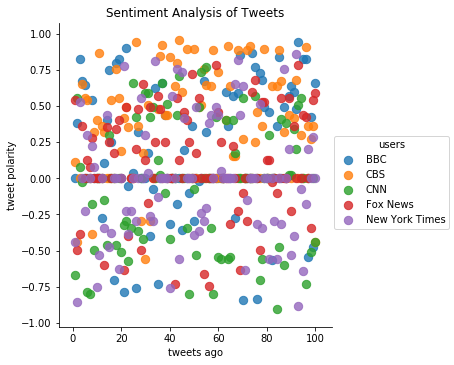

In [62]:
# library & dataset
import seaborn as sns

sns.lmplot(x="tweets ago", y="tweet polarity", data=df, fit_reg=False, hue="users", legend=True, scatter_kws={"s":70})
plt.title('Sentiment Analysis of Tweets')
plt.savefig('sent.png', bbox_inches='tight', dpi=100)


In [50]:
df_avg = df.groupby('users')['tweet polarity'].mean()
df_avg

users
BBC               0.169330
CBS               0.348781
CNN              -0.035197
Fox News          0.108742
New York Times   -0.004963
Name: tweet polarity, dtype: float64

In [51]:
df_avg.index

Index(['BBC', 'CBS', 'CNN', 'Fox News', 'New York Times'], dtype='object', name='users')

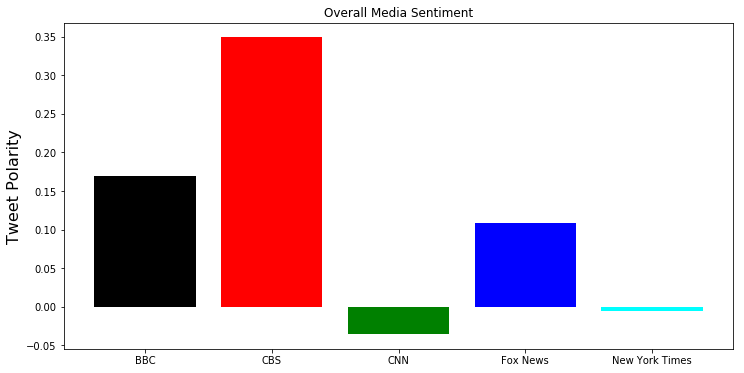

In [63]:
plt.figure(figsize=(12,6))
plt.bar(np.arange(len(df_avg.index)), df_avg.values, color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xticks(np.arange(len(df_avg.index)), df_avg.index,)
plt.ylabel("Tweet Polarity", fontsize=16)
plt.title('Overall Media Sentiment')
plt.savefig('overall.png', bbox_inches='tight', dpi=100)
plt.show()